In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('ggplot')

In [2]:
class KMeansClustering:
    def __init__(self, k = 3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def fit(self, data):

        self.centroids = {}

        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #find the distance between the point and cluster; choose the nearest centroid
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            isOptimal = True

            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


In [3]:
df = pd.read_csv('mnist_784.csv', header=0)
df = df[1:701]
Y = df['class']
X = df.drop(['class'], axis=1)

X = MinMaxScaler().fit_transform(X=X)

principal = PCA(n_components=2).fit_transform(X)
principal = list(map(list, zip(*principal)))
principal_df = pd.DataFrame(zip(*principal, Y))
print(principal_df)

            0         1  2
0    4.260733  0.963383  0
1    0.044858 -1.565991  4
2   -3.447283  2.895444  1
3   -1.369309 -2.445435  9
4    0.729274 -0.811024  2
..        ...       ... ..
695 -1.287485  2.778615  2
696  1.266065 -2.991471  4
697 -3.431429  3.414038  1
698  3.131494  0.779379  5
699 -0.359363 -2.925697  4

[700 rows x 3 columns]


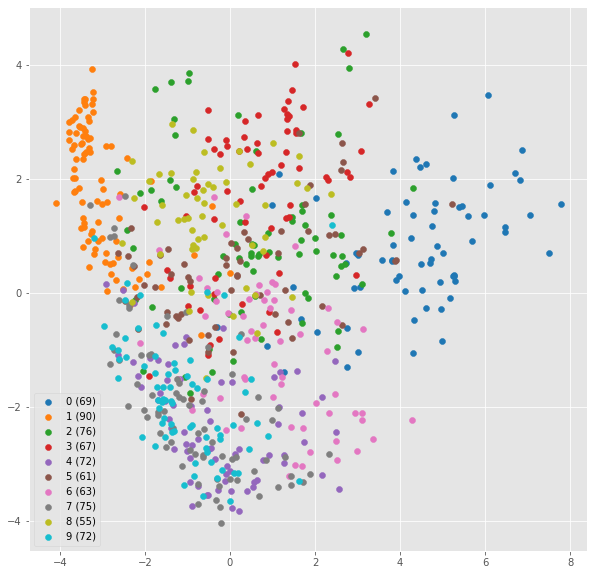

In [4]:
plt.figure(figsize=(10, 10))
colors = mcolors.TABLEAU_COLORS
labels = range(0, 10)

for label, color in zip(labels, colors):
    rows_to_draw = principal_df[2] == label
    plt.scatter(principal_df.loc[rows_to_draw, 0],
                principal_df.loc[rows_to_draw, 1],
                c=color,
                label=f'{label} ({rows_to_draw.sum()})')

plt.legend()
plt.show()

# k_means = KMeansClustering(k=5)
# k_means.fit(X)
# Y_pred = k_means.pred(X)
#
# plot_confusion_matrix(k_means, X, Y)